In [3310]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error,classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier





## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3312]:
df = pd.read_csv("C:/Users/ohoud/OneDrive/Desktop/Tuwaiq/Usecase-7/final_data.csv")  

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3314]:
df.head()

player               team  \
0        /david-de-gea/profil/spieler/59377  Manchester United   
1       /jack-butland/profil/spieler/128899  Manchester United   
2          /tom-heaton/profil/spieler/34130  Manchester United   
3  /lisandro-martinez/profil/spieler/480762  Manchester United   
4     /raphael-varane/profil/spieler/164770  Manchester United   

                name              position  height   age  appearance  \
0       David de Gea            Goalkeeper   189.0  32.0         104   
1       Jack Butland            Goalkeeper   196.0  30.0          15   
2         Tom Heaton            Goalkeeper   188.0  37.0           4   
3  Lisandro Martínez  Defender Centre-Back   175.0  25.0          82   
4     Raphaël Varane  Defender Centre-Back   191.0  30.0          63   

      goals   assists  yellow cards  ...  goals conceded  clean sheets  \
0  0.000000  0.000000      0.009585  ...        1.217252      0.335463   
1  0.000000  0.000000      0.069018  ...        1.242331      0.207055   
2  0.000000  0.000000      0.000000  ...        0.616438      0.924658   
3  0.028090  0.056180      0.224719  ...        0.000000      0.000000   
4  0.017889  0.017889      0.053667  ...        0.000000      0.000000   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   
1            1304           510             58      1        1500000   
2             292           697             84      4         600000   
3            6408           175             22      9       50000000   
4            5031           238             51     21       40000000   

   highest_value  position_encoded  winger  
0       70000000                 1       0  
1       22000000                 1       0  
2        6000000                 1       0  
3       50000000                 2       0  
4       80000000                 2       0  

[5 rows x 22 columns]

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [3316]:
df.shape

(10754, 22)

In [3317]:
df.describe()

height           age    appearance         goals       assists  \
count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
mean     181.240353     26.041903     36.407011      0.125554      0.086978   
std        6.969818      4.777629     26.526541      0.235585      0.143351   
min      156.000000     15.000000      0.000000      0.000000      0.000000   
25%      176.000000     22.000000     12.000000      0.000000      0.000000   
50%      181.240353     26.000000     35.000000      0.045969      0.040773   
75%      186.000000     29.000000     59.000000      0.172263      0.133136   
max      206.000000     43.000000    107.000000     11.250000      4.000000   

       yellow cards  second yellow cards     red cards  goals conceded  \
count  10754.000000         10754.000000  10754.000000    10754.000000   
mean       0.189757             0.004666      0.006826        0.131655   
std        0.432388             0.025232      0.081143        0.442335   
min        0.000000             0.000000      0.000000        0.000000   
25%        0.053191             0.000000      0.000000        0.000000   
50%        0.150250             0.000000      0.000000        0.000000   
75%        0.248276             0.000000      0.000000        0.000000   
max       30.000000             1.000000      6.923077        9.000000   

       clean sheets  minutes played  days_injured  games_injured  \
count  10754.000000    10754.000000  10754.000000   10754.000000   
mean       0.044881     2470.789381    117.961689      15.826297   
std        0.924437     2021.703271    175.206827      23.383606   
min        0.000000        0.000000      0.000000       0.000000   
25%        0.000000      660.000000      0.000000       0.000000   
50%        0.000000     2101.500000     37.000000       5.000000   
75%        0.000000     3968.000000    181.000000      24.000000   
max       90.000000     9510.000000   2349.000000     339.000000   

              award  current_value  highest_value  position_encoded  \
count  10754.000000   1.075400e+04   1.075400e+04      10754.000000   
mean       1.960759   3.622971e+06   6.152606e+06          2.713223   
std        3.743936   9.095410e+06   1.338988e+07          0.986356   
min        0.000000   0.000000e+00   0.000000e+00          1.000000   
25%        0.000000   3.000000e+05   4.500000e+05          2.000000   
50%        1.000000   8.000000e+05   1.500000e+06          3.000000   
75%        2.000000   3.000000e+06   5.000000e+06          4.000000   
max       92.000000   1.800000e+08   2.000000e+08          4.000000   

             winger  
count  10754.000000  
mean       0.307513  
std        0.461485  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [3318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### [[explanation of each column in your dataset:]]

##### player_id: A unique identifier for each player.
##### team: The team the player belongs to.
##### name: The name of the player.
##### position: The playing position of the player (e.g., forward, midfielder, defender).
##### height: The height of the player, likely in meters or centimeters, represented as a float.
##### age: The age of the player, an integer value.
##### appearance: The number of appearances or matches the player has played.
##### goals: The total number of goals the player has scored.
##### assists: The total number of assists provided by the player.
##### yellow cards: The number of yellow cards the player has received.
##### second yellow cards: The number of second yellow cards leading to expulsion (red card).
##### red cards: The total number of red cards received by the player.
##### goals conceded: The number of goals the player has allowed (likely for goalkeepers or defenders).
##### clean sheets: The number of games where the player (usually a goalkeeper or defender) did not allow any goals.
##### minutes played: Total minutes the player has spent on the field in matches.
##### days_injured: Total number of days the player has been injured.
##### games_injured: Total number of games the player missed due to injury.
##### award: Number of awards or distinctions the player has received.
##### current_value: The current market value of the player (likely in a specific currency, such as euros or dollars).
##### highest_value: The highest market value the player has achieved in their career.
##### position_encoded: A numerical encoding of the player's position for analysis or modeling.
##### winger: A binary or categorical variable indicating whether the player is a winger or not (likely coded as 1 for "Yes" and 0 for "No").

## Preprocessing the Data

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

##### data source publish this data from  players competing in several top-tier global football leagues:
##### 11 European leagues, including the Premier League and Championship in England, Bundesliga in Germany, La Liga in Spain, Serie A in Italy, Ligue 1 in France, Eredivisie in the Netherlands, Liga NOS in Portugal, Premier Liga in Russia, Super Lig in Turkey, and Bundesliga in Austria.
##### 4 American leagues, including Brasileiro in Brazil, Major League Soccer in the United States, Primera División in Argentina, and Liga MX in Mexico.
##### 1 African league, namely the DStv Premiership in South Africa.
##### 4 Asian leagues, comprising J-League in Japan, Saudi Pro League in Saudi Arabia, K-League 1 in South Korea, and A-League in Australia.


#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

##### data is not up to date , it is in 2 season 2021-2022 and 2022-2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


##### data is consistent and has only one file 

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [3328]:
df.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [3330]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [3332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [3333]:
df.head(2)

player               team          name  \
0   /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   
1  /jack-butland/profil/spieler/128899  Manchester United  Jack Butland   

     position  height   age  appearance  goals  assists  yellow cards  ...  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585  ...   
1  Goalkeeper   196.0  30.0          15    0.0      0.0      0.069018  ...   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   
1        1.242331      0.207055            1304           510             58   

   award  current_value  highest_value  position_encoded  winger  
0     13       15000000       70000000                 1       0  
1      1        1500000       22000000                 1       0  

[2 rows x 22 columns]

##### 1. Change the player column into integer by spliting the column and extract only the id number
##### then check its uniqueness and change it to int datatype 
##### then rename the column to player_id

In [3335]:
df['player']=df['player'].str.split("/").apply(lambda x : x[4] if len(x) >=4 else  None)

In [3336]:
df['player'].nunique()

10754

In [3337]:
df['player'].duplicated().sum()

0

In [3338]:
df['player']=df['player'].astype(int)

In [3339]:
df['player'].dtypes

dtype('int32')

In [3340]:
df.rename(columns={"player":"player_id"},inplace =True)

In [3341]:
df

player_id                      team                name  \
0          59377         Manchester United        David de Gea   
1         128899         Manchester United        Jack Butland   
2          34130         Manchester United          Tom Heaton   
3         480762         Manchester United   Lisandro Martínez   
4         164770         Manchester United      Raphaël Varane   
...          ...                       ...                 ...   
10749     867763  Western Sydney Wanderers       Aidan Simmons   
10750     708099  Western Sydney Wanderers        Kusini Yengi   
10751    1023268  Western Sydney Wanderers     Nathanael Blair   
10752     703657  Western Sydney Wanderers    Zachary Sapsford   
10753     957230  Western Sydney Wanderers  Alexander Badolato   

                    position      height   age  appearance     goals  \
0                 Goalkeeper  189.000000  32.0         104  0.000000   
1                 Goalkeeper  196.000000  30.0          15  0.000000   
2                 Goalkeeper  188.000000  37.0           4  0.000000   
3       Defender Centre-Back  175.000000  25.0          82  0.028090   
4       Defender Centre-Back  191.000000  30.0          63  0.017889   
...                      ...         ...   ...         ...       ...   
10749     Attack-RightWinger  181.240353  20.0          16  0.175953   
10750  Attack Centre-Forward  190.000000  24.0          26  0.372671   
10751  Attack Centre-Forward  181.240353  19.0          20  0.375000   
10752  Attack Centre-Forward  181.240353  20.0          17  0.312139   
10753  Attack Centre-Forward  170.000000  18.0          21  0.000000   

        assists  yellow cards  ...  goals conceded  clean sheets  \
0      0.000000      0.009585  ...        1.217252      0.335463   
1      0.000000      0.069018  ...        1.242331      0.207055   
2      0.000000      0.000000  ...        0.616438      0.924658   
3      0.056180      0.224719  ...        0.000000      0.000000   
4      0.017889      0.053667  ...        0.000000      0.000000   
...         ...           ...  ...             ...           ...   
10749  0.087977      0.263930  ...        0.000000      0.000000   
10750  0.186335      0.186335  ...        0.000000      0.000000   
10751  0.000000      0.187500  ...        0.000000      0.000000   
10752  0.104046      0.000000  ...        0.000000      0.000000   
10753  0.000000      0.086042  ...        0.000000      0.000000   

       minutes played  days_injured  games_injured  award  current_value  \
0                9390            42              5     13       15000000   
1                1304           510             58      1        1500000   
2                 292           697             84      4         600000   
3                6408           175             22      9       50000000   
4                5031           238             51     21       40000000   
...               ...           ...            ...    ...            ...   
10749            1023             0              0      0          75000   
10750            1449           102             18      0         300000   
10751             960             0              0      0          50000   
10752             865             0              0      0          50000   
10753            1046             0              0      0          25000   

       highest_value  position_encoded  winger  
0           70000000                 1       0  
1           22000000                 1       0  
2            6000000                 1       0  
3           50000000                 2       0  
4           80000000                 2       0  
...              ...               ...     ...  
10749          75000                 4       1  
10750         300000                 4       0  
10751          50000                 4       0  
10752          50000                 4       0  
10753          25000                 4       0  

[10754 rows x 22 columns]

In [3342]:
df['team'].value_counts()

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [3343]:
df['name'].value_counts()

name
Paulinho              6
Vitinho               5
Guilherme             5
Fernando              4
João Pedro            4
                     ..
Everson               1
Matheus Mendes        1
Gabriel Delfim        1
Nathan Silva          1
Alexander Badolato    1
Name: count, Length: 10584, dtype: int64

In [3344]:
df['height']=df['height'].round(2)

In [3345]:
df['age']=df['age'].astype(int)

In [3346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            10754 non-null  int32  
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  int32  
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [3347]:
df.head(6)

player_id               team               name              position  \
0      59377  Manchester United       David de Gea            Goalkeeper   
1     128899  Manchester United       Jack Butland            Goalkeeper   
2      34130  Manchester United         Tom Heaton            Goalkeeper   
3     480762  Manchester United  Lisandro Martínez  Defender Centre-Back   
4     164770  Manchester United     Raphaël Varane  Defender Centre-Back   
5     177907  Manchester United      Harry Maguire  Defender Centre-Back   

   height  age  appearance     goals   assists  yellow cards  ...  \
0   189.0   32         104  0.000000  0.000000      0.009585  ...   
1   196.0   30          15  0.000000  0.000000      0.069018  ...   
2   188.0   37           4  0.000000  0.000000      0.000000  ...   
3   175.0   25          82  0.028090  0.056180      0.224719  ...   
4   191.0   30          63  0.017889  0.017889      0.053667  ...   
5   194.0   30          68  0.037799  0.000000      0.302394  ...   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   
1        1.242331      0.207055            1304           510             58   
2        0.616438      0.924658             292           697             84   
3        0.000000      0.000000            6408           175             22   
4        0.000000      0.000000            5031           238             51   
5        0.000000      0.000000            4762           148             27   

   award  current_value  highest_value  position_encoded  winger  
0     13       15000000       70000000                 1       0  
1      1        1500000       22000000                 1       0  
2      4         600000        6000000                 1       0  
3      9       50000000       50000000                 2       0  
4     21       40000000       80000000                 2       0  
5      1       25000000       70000000                 2       0  

[6 rows x 22 columns]

In [3348]:
df['goals']=df['goals'].astype(int)

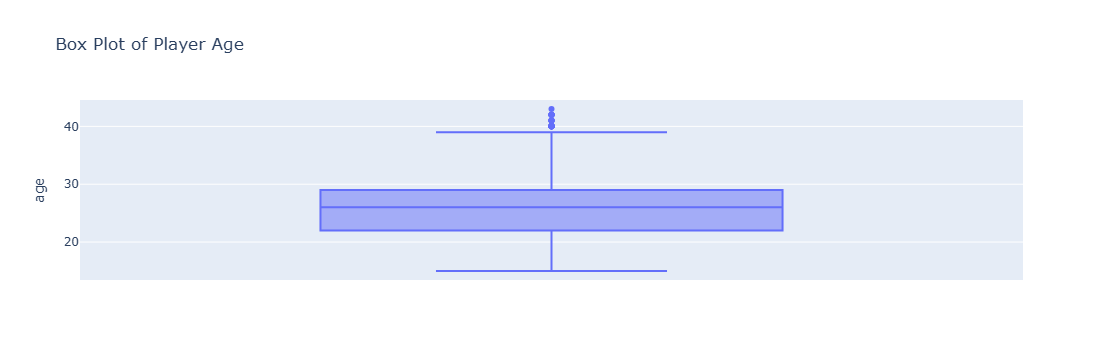

In [3349]:
# check outliers
fig = px.box(df, y='age', title="Box Plot of Player Age")

# Show the plot
fig.show() # I will consider 40 as outlier

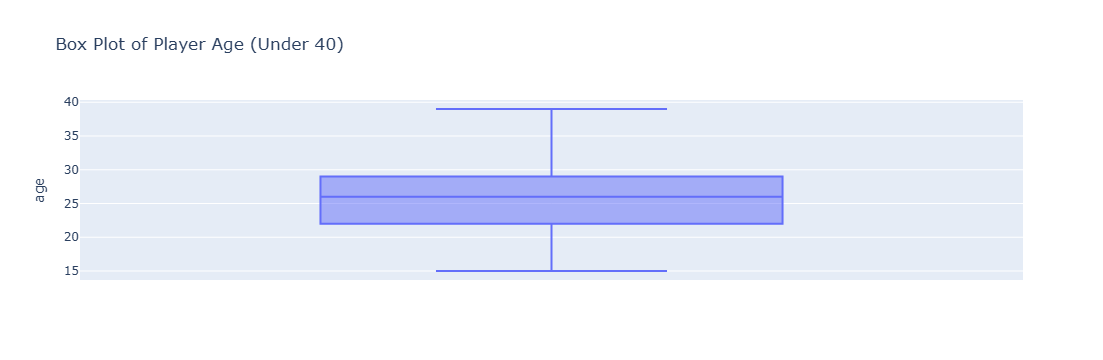

In [3350]:
df_filtered = df[df['age'] < 40]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='age', title="Box Plot of Player Age (Under 40)")

# Show the plot
fig.show()

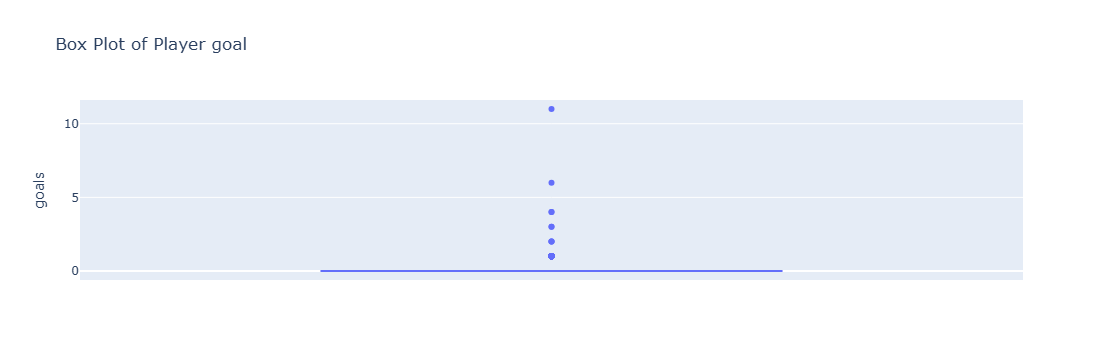

In [3351]:
# check outliers
fig = px.box(df, y='goals', title="Box Plot of Player goal")

# Show the plot
fig.show() 

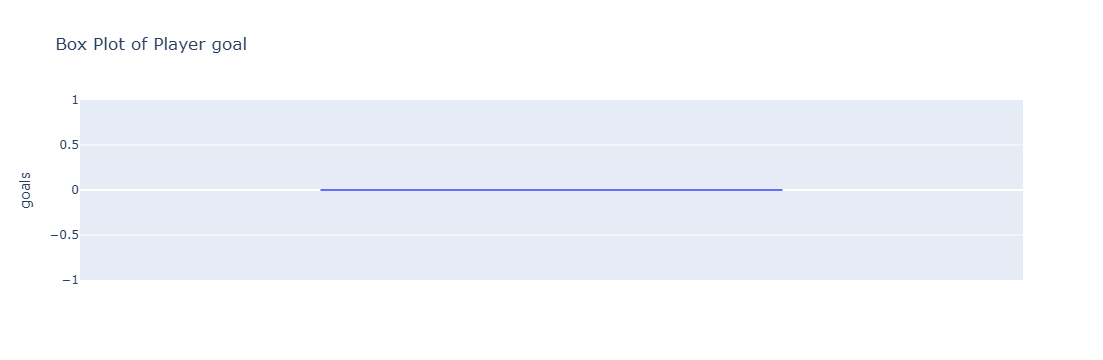

In [3352]:
df_filtered = df[df['goals'] <1]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='goals', title="Box Plot of Player goal ")

# Show the plot
fig.show()

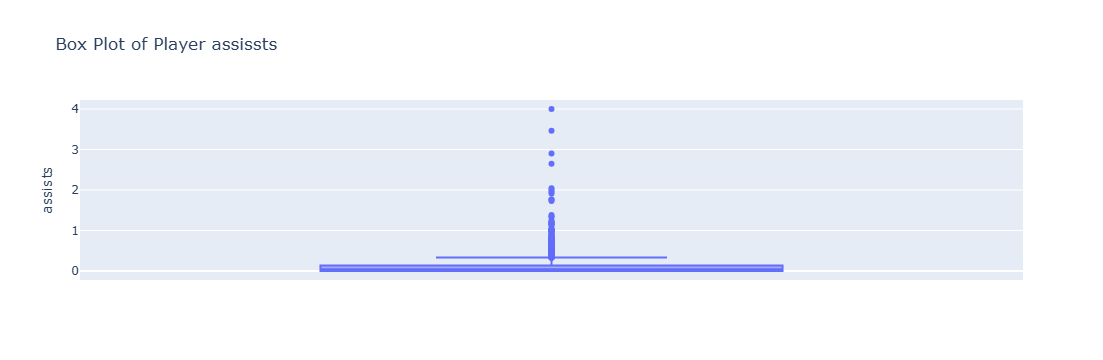

In [3353]:
# check outliers
fig = px.box(df, y='assists', title="Box Plot of Player assissts")

# Show the plot
fig.show() 

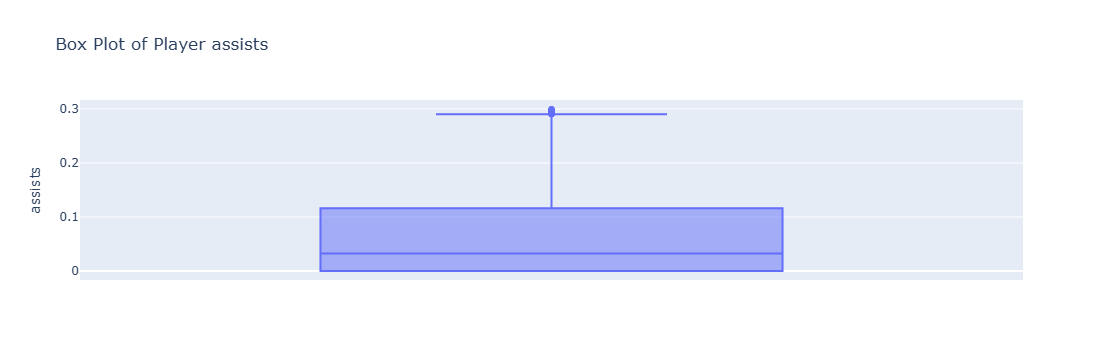

In [3354]:
df_filtered = df[df['assists'] <.3]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='assists', title="Box Plot of Player assists ")

# Show the plot
fig.show()

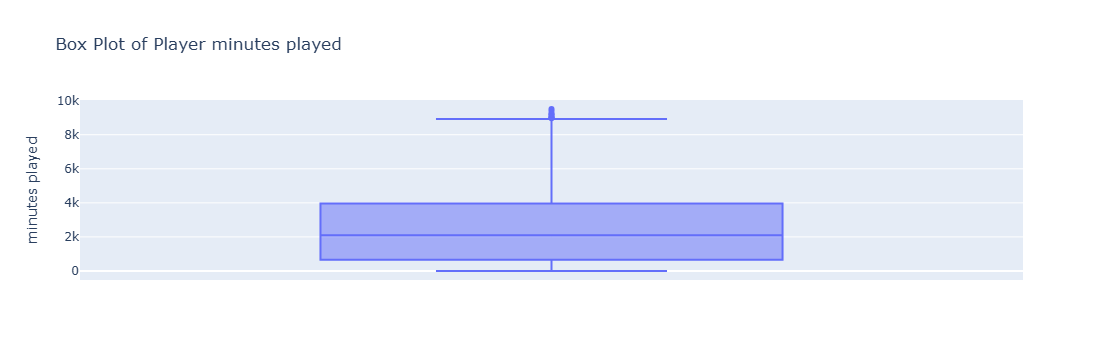

In [3355]:
# check outliers
fig = px.box(df, y='minutes played', title="Box Plot of Player minutes played")

# Show the plot
fig.show() 

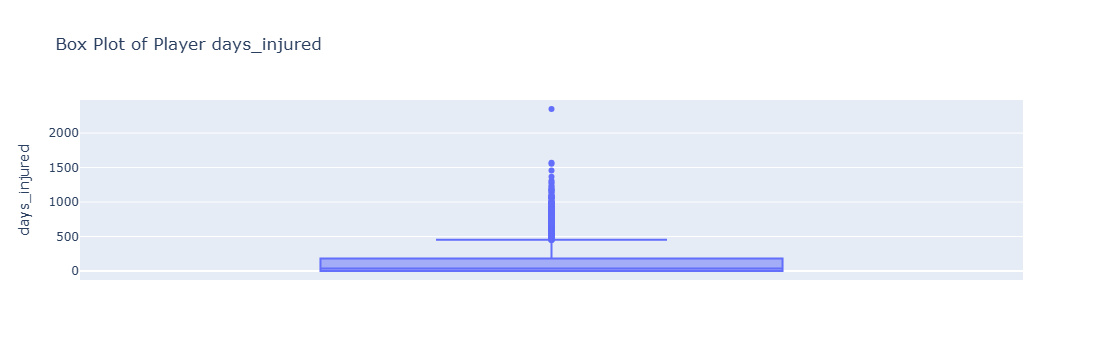

In [3356]:
# check outliers
fig = px.box(df, y='days_injured', title="Box Plot of Player days_injured")

# Show the plot
fig.show() 

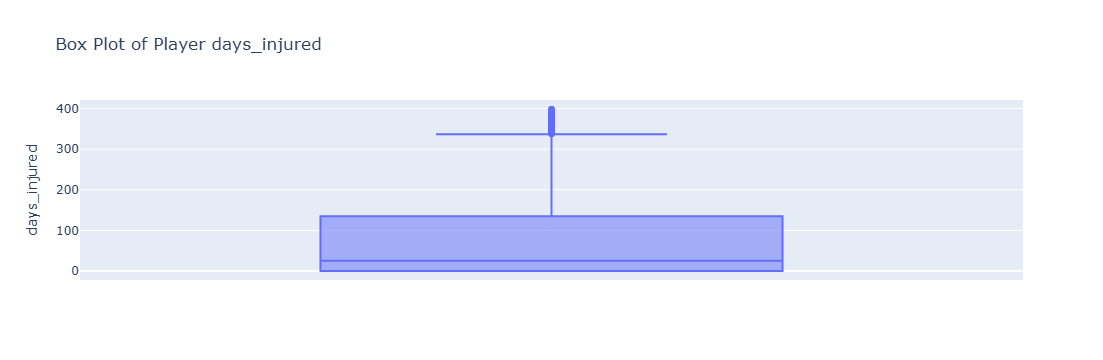

In [3357]:
df_filtered = df[df['days_injured'] <400]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='days_injured', title="Box Plot of Player days_injured ")

# Show the plot
fig.show()

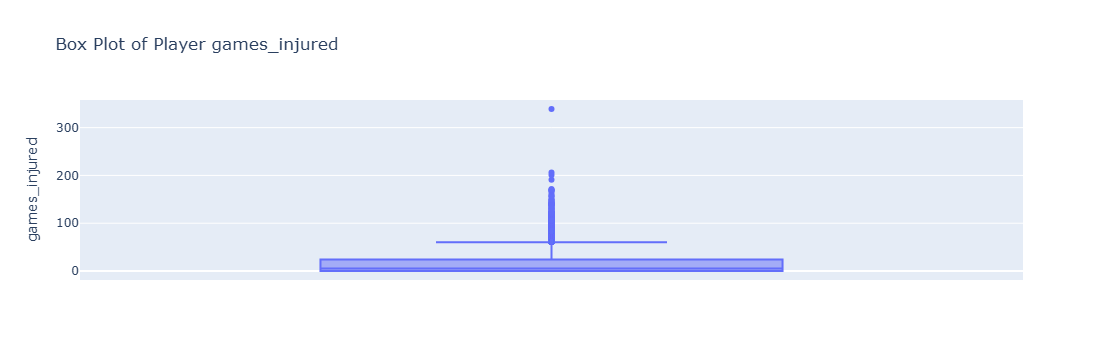

In [3358]:
# check outliers
fig = px.box(df, y='games_injured', title="Box Plot of Player games_injured")

# Show the plot
fig.show() 

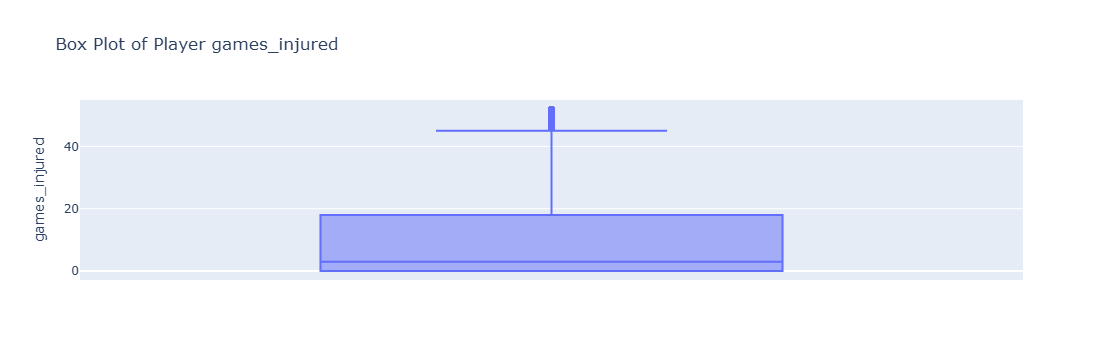

In [3359]:
df_filtered = df[df['games_injured'] <53]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='games_injured', title="Box Plot of Player games_injured ")

# Show the plot
fig.show()

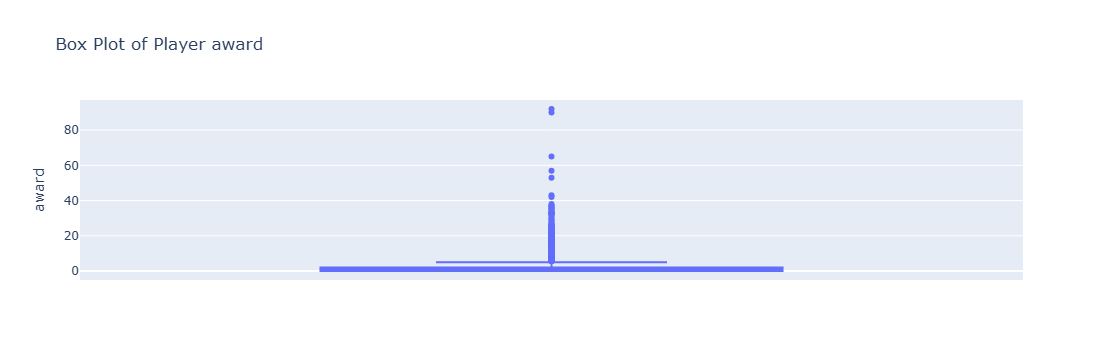

In [3360]:
# check outliers
fig = px.box(df, y='award', title="Box Plot of Player award")

# Show the plot
fig.show() 

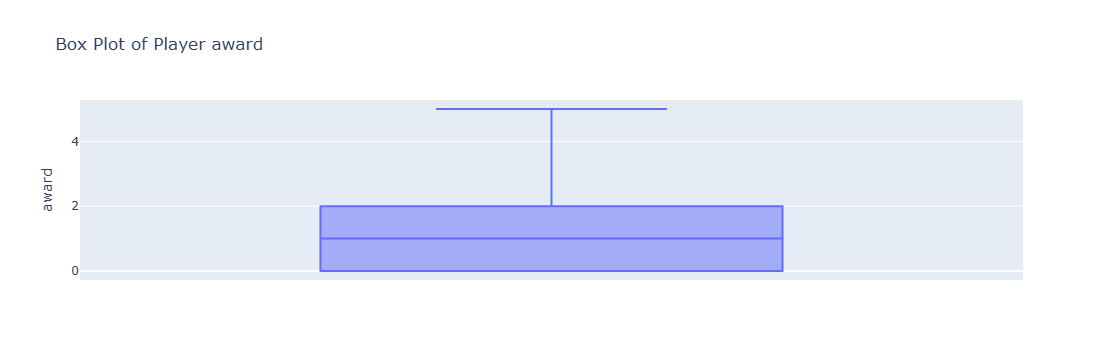

In [3361]:
df_filtered = df[df['award'] <6]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='award', title="Box Plot of Player award ")

# Show the plot
fig.show()

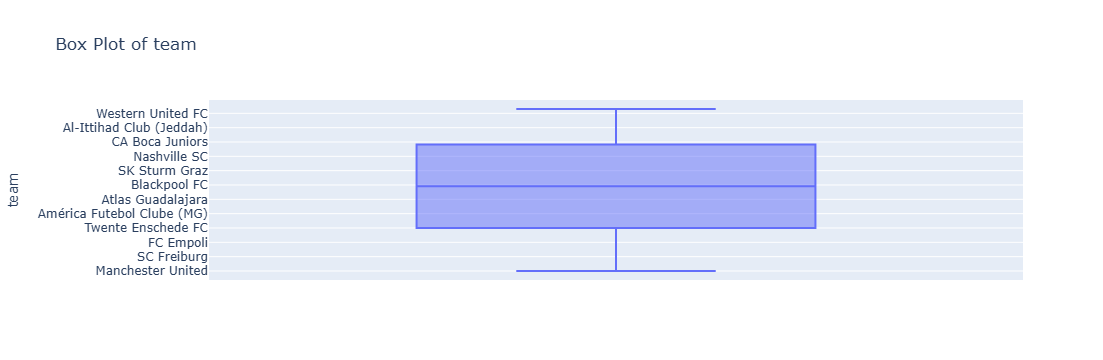

In [3362]:
# check outliers
fig = px.box(df, y='team', title="Box Plot of team")

# Show the plot
fig.show() 

### Predicting Current Player Value (current_value) as category values 
#### Dependent Variable: current_value
#### Independent Variables: age, goals, assists, minutes played, days_injured, games_injured, award, team

##### 1. Before we start feeding the model with data , we want to check the selected independent features correlations, and ommit any feature that is highly correlated to another one 

In [3365]:
df.columns

Index(['player_id', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [3366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            10754 non-null  int32  
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  int32  
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  int32  
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

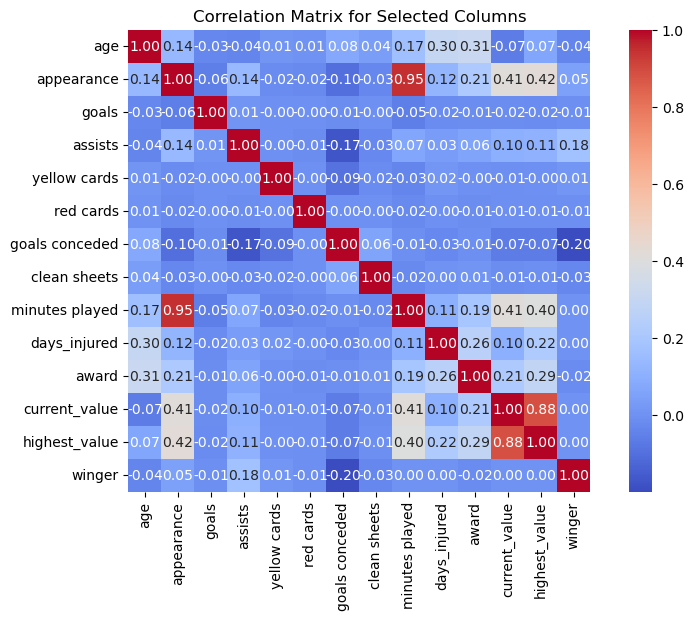

In [3367]:
df=df_filtered
# Specify the columns for correlation
columns_of_interest = [ 'age', 'appearance',
       'goals', 'assists', 'yellow cards',  'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'award', 'current_value', 'highest_value',
        'winger']  

# Calculate correlation only for specified columns
correlation_matrix = df[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Selected Columns')
plt.show()

In [3368]:
df_filtered.columns

Index(['player_id', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

##### game_injured is highly correlated with days_injured so we will take only one of them 
##### we should considered highe

In [3370]:
df_filtered=df_filtered.copy()






In [3371]:
df_filtered.columns

Index(['player_id', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [3372]:



# Define the independent variables (X) again before scaling
X = df_filtered[['age', 
       'goals', 'assists', 'yellow cards',  'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'award', 'highest_value','current_value',
        'winger'] + 
               [col for col in df_filtered.columns if 'team_' in col]]


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the independent variables and transform them
#X = scaler.fit_transform(X)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



In [3373]:
X.shape

(9720, 13)

In [3374]:
X.head(2)

age    goals   assists  yellow cards  red cards  goals conceded  \
0  0.972807 -0.05078 -0.581269     -0.275279  -0.082486        2.478490   
1  2.508819 -0.05078 -0.581269     -0.431147  -0.082486        1.081432   

   clean sheets  minutes played  days_injured     award  highest_value  \
0      0.167342       -0.539444      2.399917 -0.043771       1.965971   
1      0.907557       -1.052932      3.510301  2.149277       0.175597   

   current_value    winger  
0      -0.205322 -0.672505  
1      -0.336822 -0.672505

### -----------------------------------------Start K means model---------------------------------------------

In [3376]:
from sklearn.cluster import KMeans

wcss = []  # Initialize an empty list to store WCSS values
for i in range(1, 20):  # Test 1 to 19 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',  # Optimized centroid initialization
                    max_iter=300,      # Maximum number of iterations per run
                    n_init=10,         # Number of different initializations to run
                    random_state=0)    # Ensures reproducibility
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Store the WCSS (inertia) for the current number of clusters


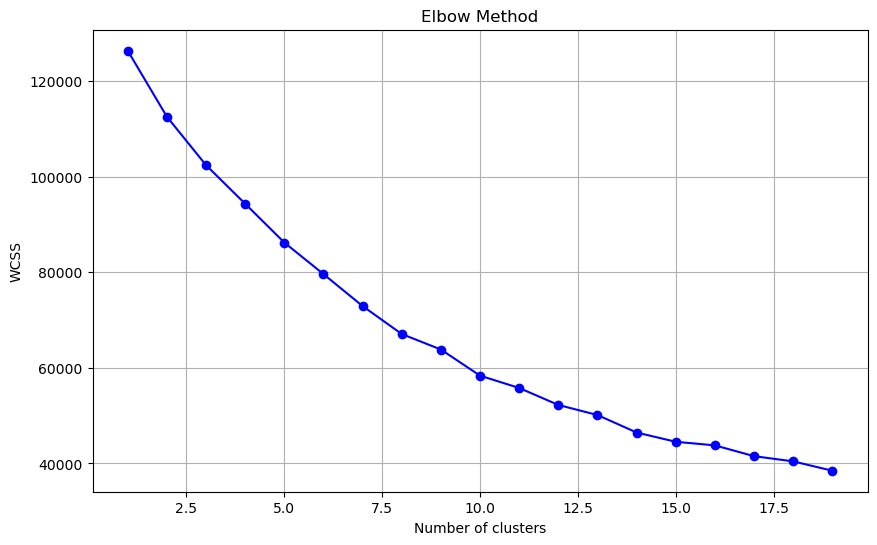

In [3377]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))  # Set the figure size for clarity
plt.plot(range(1, 20), wcss, marker='o', linestyle='-', color='b')  # Plot WCSS vs. number of clusters
plt.title('Elbow Method')  # Add a title to the plot
plt.xlabel('Number of clusters')  # Label the x-axis
plt.ylabel('WCSS')  # Label the y-axis
plt.grid(True)  # Add gridlines for easier reading
plt.show()  # Display the plot


In [3378]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3  # Replace with the optimal number based on your elbow curve analysis
model = KMeans(
    n_clusters=optimal_clusters,  # Set to the optimal number of clusters
    init='k-means++',             # Efficient centroid initialization
    max_iter=300,                 # Maximum iterations for convergence
    n_init=10,                    # Run the algorithm 10 times for stability
    random_state=0                # Set random state for reproducibility
)


In [3379]:
# Fit the model on the training data
y_pred = model.fit_predict(X)

In [3380]:
X.head(2)

age    goals   assists  yellow cards  red cards  goals conceded  \
0  0.972807 -0.05078 -0.581269     -0.275279  -0.082486        2.478490   
1  2.508819 -0.05078 -0.581269     -0.431147  -0.082486        1.081432   

   clean sheets  minutes played  days_injured     award  highest_value  \
0      0.167342       -0.539444      2.399917 -0.043771       1.965971   
1      0.907557       -1.052932      3.510301  2.149277       0.175597   

   current_value    winger  
0      -0.205322 -0.672505  
1      -0.336822 -0.672505

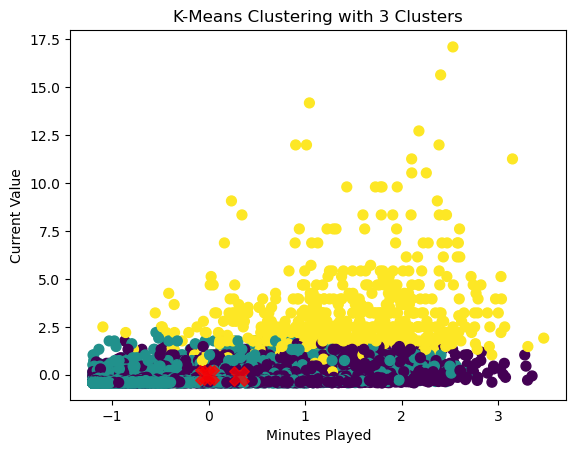

In [3479]:
# Plotting the clusters with optimal number
plt.scatter(X['minutes played'], X['current_value'], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_  # Retrieve the coordinates of the cluster centers
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')  # Plot the cluster centers
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')  # Set plot title
plt.xlabel('Minutes Played')  # Label for x-axis
plt.ylabel('Current Value')   # Label for y-axis
plt.show()  # Display the plot


In [3481]:
#X = pd.DataFrame(X)

# Now add y_pred as a new column
X['kmeans'] = y_pred

In [3483]:
X['kmeans'] = y_pred

In [3485]:
print(type(y_pred))
print(y_pred.shape)
print(X.shape)

<class 'numpy.ndarray'>
(9720,)
(9720, 14)


In [3487]:
X['kmeans'].value_counts()


kmeans
1    5783
0    3371
2     566
Name: count, dtype: int64

In [3489]:
X[X['kmeans']==0]


age    goals   assists  yellow cards  red cards  goals conceded  \
0     0.972807 -0.05078 -0.581269     -0.275279  -0.082486        2.478490   
1     2.508819 -0.05078 -0.581269     -0.431147  -0.082486        1.081432   
19    2.728249 -0.05078 -0.581269     -0.339080  -0.082486        2.678022   
21    2.069958 -0.05078 -0.581269     -0.186707  -0.082486       -0.294522   
22    1.631098 -0.05078  0.392411     -0.177913   0.246978       -0.294522   
...        ...      ...       ...           ...        ...             ...   
9699  1.631098 -0.05078 -0.581269     -0.046382  -0.082486       -0.294522   
9703  1.631098 -0.05078  0.164793      0.175213   0.548626       -0.294522   
9707  1.631098 -0.05078 -0.058089     -0.034281  -0.082486       -0.294522   
9708  1.850528 -0.05078 -0.581269     -0.345567  -0.082486       -0.294522   
9711  0.314517 -0.05078  0.378804      0.130667  -0.082486       -0.294522   

      clean sheets  minutes played  days_injured     award  highest_value  \
0         0.167342       -0.539444      2.399917 -0.043771       1.965971   
1         0.907557       -1.052932      3.510301  2.149277       0.175597   
19        0.234106        2.159411      2.661184  2.149277       0.511292   
21       -0.046238        0.486516      3.314351  2.880293       0.958885   
22       -0.046238        2.056916      0.713559 -0.043771       0.846987   
...            ...             ...           ...       ...            ...   
9699     -0.046238        0.943176      1.818005  2.149277      -0.327946   
9703     -0.046238       -0.350692      1.681434  2.880293       2.861157   
9707     -0.046238        0.617933     -0.384949 -0.043771      -0.271996   
9708     -0.046238        0.003980     -0.076179 -0.043771      -0.411869   
9711     -0.046238        0.450999      1.746751 -0.043771      -0.361515   

      current_value    winger  kmeans  
0         -0.205322 -0.672505       0  
1         -0.336822 -0.672505       0  
19        -0.278378 -0.672505       0  
21        -0.278378 -0.672505       0  
22        -0.059211  1.486977       0  
...             ...       ...     ...  
9699      -0.387961  1.486977       0  
9703      -0.205322 -0.672505       0  
9707      -0.351433 -0.672505       0  
9708      -0.373350 -0.672505       0  
9711      -0.322211  1.486977       0  

[3371 rows x 14 columns]

In [3491]:
X

age    goals   assists  yellow cards  red cards  goals conceded  \
0     0.972807 -0.05078 -0.581269     -0.275279  -0.082486        2.478490   
1     2.508819 -0.05078 -0.581269     -0.431147  -0.082486        1.081432   
2     0.972807 -0.05078 -0.581269      0.251766  -0.082486       -0.294522   
3    -1.002065 -0.05078 -0.581269     -0.136365  -0.082486       -0.294522   
4     0.314517 -0.05078  0.593517      0.367417  -0.082486       -0.294522   
...        ...      ...       ...           ...        ...             ...   
9715 -1.221495 -0.05078  0.029874      0.164900  -0.082486       -0.294522   
9716 -0.343774 -0.05078  0.713140     -0.010335  -0.082486       -0.294522   
9717 -1.440925 -0.05078 -0.581269     -0.007705  -0.082486       -0.294522   
9718 -1.221495 -0.05078  0.141505     -0.431147   1.140338       -0.294522   
9719 -1.660355 -0.05078 -0.581269     -0.236833  -0.082486       -0.294522   

      clean sheets  minutes played  days_injured     award  highest_value  \
0         0.167342       -0.539444      2.399917 -0.043771       1.965971   
1         0.907557       -1.052932      3.510301  2.149277       0.175597   
2        -0.046238        1.215141      0.250404 -0.043771       7.337091   
3        -0.046238        0.198314     -0.349322 -0.774787      -0.271996   
4        -0.046238        1.769221      2.002079  2.149277       4.203937   
...            ...             ...           ...       ...            ...   
9715     -0.046238       -0.682023     -0.628402 -0.774787      -0.487401   
9716     -0.046238       -0.465871     -0.022738 -0.774787      -0.462224   
9717     -0.046238       -0.713989     -0.628402 -0.774787      -0.490198   
9718     -0.046238       -0.762192     -0.628402 -0.774787      -0.490198   
9719     -0.046238       -0.670353     -0.628402 -0.774787      -0.492996   

      current_value    winger  kmeans  
0         -0.205322 -0.672505       0  
1         -0.336822 -0.672505       0  
2          3.228289 -0.672505       2  
3         -0.132267 -0.672505       1  
4          4.689399  1.486977       2  
...             ...       ...     ...  
9715      -0.413531  1.486977       1  
9716      -0.380656 -0.672505       1  
9717      -0.417183 -0.672505       1  
9718      -0.417183 -0.672505       1  
9719      -0.420836 -0.672505       1  

[9720 rows x 14 columns]

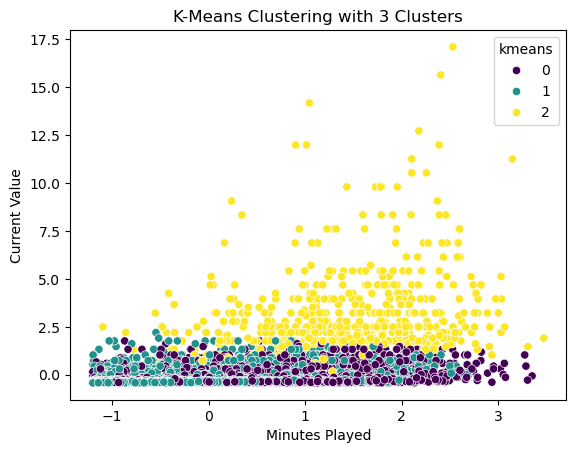

In [3497]:
# Plot with Seaborn
sns.scatterplot(data=X, x='minutes played', y='current_value', hue='kmeans', palette='viridis')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Minutes Played')
plt.ylabel('Current Value')
plt.show()

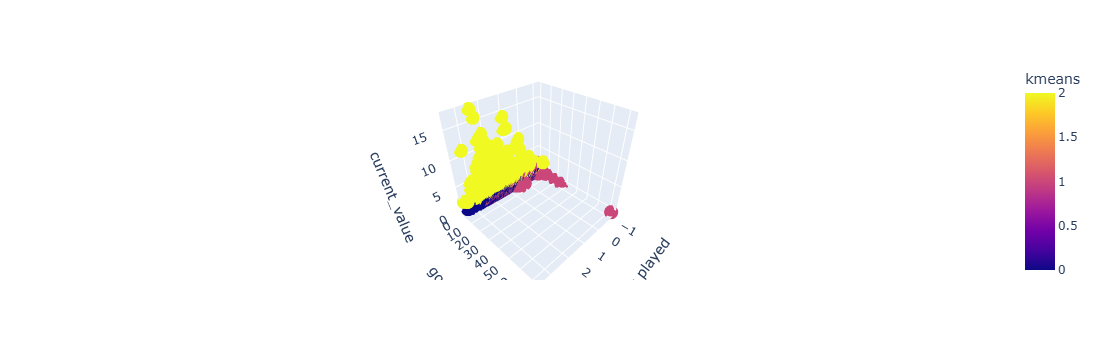

In [3501]:
import plotly
import plotly.express as px

fig = px.scatter_3d(X, x='minutes played', y='goals', z='current_value',color='kmeans')
fig.show()

### ----------------------------------------------Lets evaluate the model----------------------------------------

### Use Silhouette Score
###### it is Measures how similar each point is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where a higher score indicates better-defined clusters.

In [3531]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, y_pred)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.21676354813182486


##### A silhouette score of 0.213 suggests that your clusters are not very well-defined.

##### We will Try Different Numbers of Clusters:

##### Although I selected 3 clusters based on the Elbow Method, the optimal number of clusters could differ. Experiment with different cluster counts (2–6) and calculate the silhouette score for each.

In [3537]:
for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=0)
    y_pred = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_pred)
    print(f'Silhouette Score for {k} clusters: {silhouette_avg}')


Silhouette Score for 2 clusters: 0.20312248250295648
Silhouette Score for 3 clusters: 0.2132993162121835
Silhouette Score for 4 clusters: 0.21416615230042793
Silhouette Score for 5 clusters: 0.23182163938231629
Silhouette Score for 6 clusters: 0.21676354813182486


#####  silhouette scores across different cluster counts indicate that 5 clusters give the highest silhouette score (0.2318). While this score is slightly higher than the others, it’s still relatively low, which suggests that there’s some overlap among clusters or that the data may not be naturally separable into distinct clusters.

##### More improvement could be done to clustering quality by Explore Dimensionality Reduction using PCA

In [3541]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Cluster on reduced dimensions
kmeans_pca = KMeans(n_clusters=5, random_state=0)
y_pred_pca = kmeans_pca.fit_predict(X_pca)
silhouette_avg_pca = silhouette_score(X_pca, y_pred_pca)
print(f'Silhouette Score with PCA-reduced data: {silhouette_avg_pca}')


Silhouette Score with PCA-reduced data: 0.30894674017157514


##### A silhouette score of 0.309 after PCA reduction indicates an improvement in cluster separability, suggesting that reducing the dimensionality helped filter out noise and made the clusters more distinct



##### Visualize the PCA-reduced clusters to interpret the clustering patterns more clearly.
##### Use a scatter plot to examine how the clusters separate in the reduced 2D or 3D PCA space.


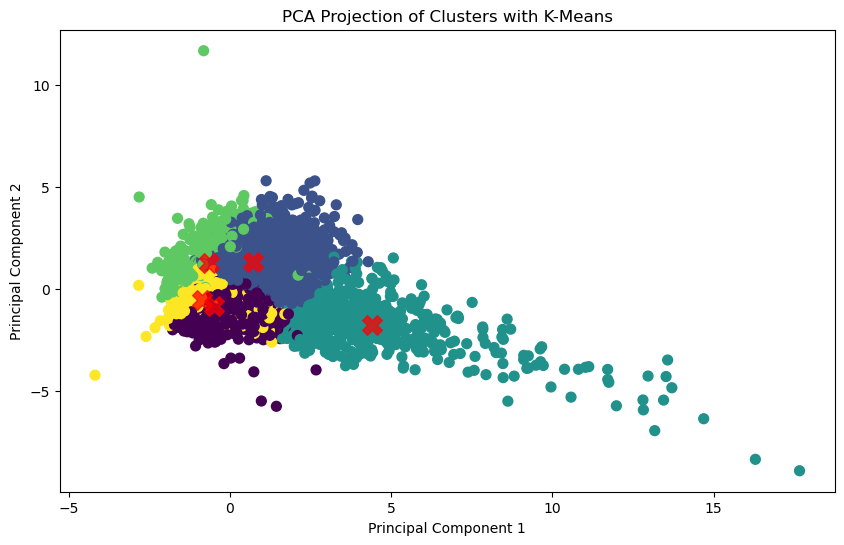

In [3544]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca, cmap='viridis', s=50)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('PCA Projection of Clusters with K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [3547]:
import pandas as pd
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
X_pca_df['Cluster'] = y_pred_pca
cluster_means = X.groupby(y_pred_pca).mean()
print(cluster_means)


        age     goals   assists  yellow cards  red cards  goals conceded  \
0 -0.380504 -0.030855  0.516055     -0.053182  -0.035997       -0.294522   
1  0.863831 -0.032130  0.014593      0.027577  -0.012049       -0.254577   
2 -0.150989 -0.039028  0.311928     -0.042637  -0.034970       -0.166666   
3  0.294694 -0.050780 -0.581269     -0.309604  -0.028119        2.976545   
4 -0.529487  0.069507 -0.292975      0.097812   0.049328       -0.272419   

   clean sheets  minutes played  days_injured     award  highest_value  \
0     -0.046238       -0.211955     -0.333632 -0.389359      -0.277533   
1     -0.037176        0.324553      0.737555  0.786941       0.067136   
2     -0.031249        1.426004      0.354466  0.662443       3.110531   
3      0.432653       -0.016183     -0.172362 -0.070370      -0.300933   
4     -0.035773       -0.375414     -0.424996 -0.506883      -0.325255   

   current_value    winger    kmeans  
0      -0.201812  1.259073  0.929498  
1      -0.100317 -0.

##### Analyze Cluster Characteristics:


##### Cluster 0:
##### kmeans = 0.929498: This player is assigned to a cluster, and the value suggests they are somewhat close to the centroid of that cluster (but not extremely close).
##### Features:
##### Goals: The player has slightly below average goals (-0.030855).
##### Assists: The player has above-average assists (0.516055).
##### Yellow Cards: The player has very few yellow cards (-0.053182).
##### Current Value: The player's market value is slightly below average (-0.201812).
##### Winger: The player is likely a winger (positive value 1.259073).
##### Cluster 1:
##### kmeans = 0.002125: This player is very close to the centroid of their assigned cluster, indicating a strong match with the cluster's characteristics.
##### Features:
##### Goals: The player is close to average in terms of goals (-0.032130).
##### Assists: The player has almost no assists (0.014593).
##### Yellow Cards: The player has a very small number of yellow cards (0.027577).
##### Current Value: The player's current market value is very close to average (-0.100317).
##### Winger: This player is not a winger (-0.113320).
##### Cluster 2:
##### kmeans = 1.991071: This player is farther from the centroid of their assigned cluster, indicating that this player might not be a perfect fit for the cluster, though they are still part of it.
##### Features:
##### Goals: This player has a moderate number of goals (-0.039028).
##### Assists: The player has relatively higher assists (0.311928).
##### Yellow Cards: The player has fewer yellow cards (-0.042637).
##### Current Value: This player has a very high market value (3.150928), suggesting they are an expensive player or a star.
##### Winger: This player is not a winger (0.010045).
##### Cluster 3:
##### kmeans = 0.550816: This player is moderately close to their cluster's centroid.
##### Features:
##### Goals: The player has slightly below average goals (-0.050780).
##### Assists: The player has a significantly negative assists value (-0.581269), suggesting they are not a major contributor in terms of assists.
##### Yellow Cards: The player has a high number of yellow cards (-0.309604).
##### Current Value: This player's current market value is below average (-0.287182).
##### Winger: This player is not a winger (-0.672505).
##### Cluster 4:
##### kmeans = 0.993185: This player is moderately close to their assigned cluster centroid.
##### Features:
##### Goals: The player has slightly above average goals (0.069507).
##### Assists: The player has a moderately negative assist value (-0.292975).
##### Yellow Cards: The player has a small number of yellow cards (0.097812).
##### Current Value: The player's market value is slightly below average (-0.243449).
##### Winger: This player is not a winger (-0.638387).

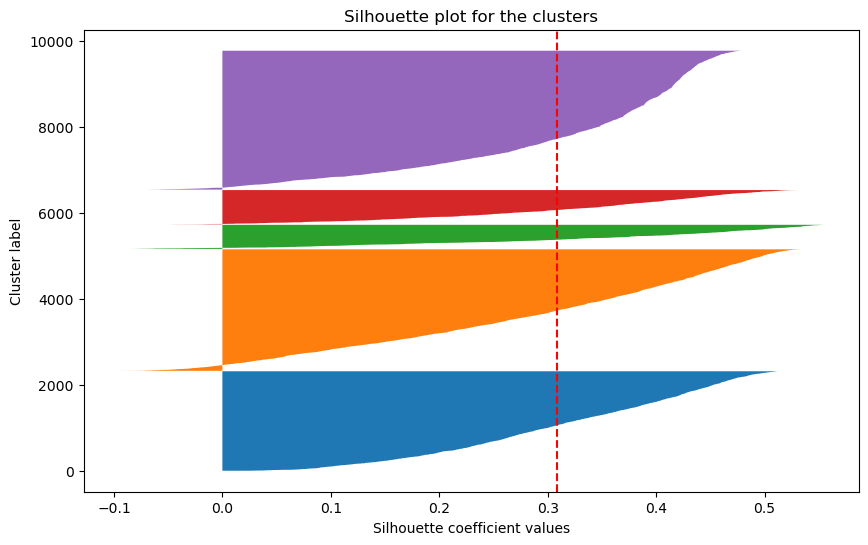

In [3519]:
from sklearn.metrics import silhouette_samples
import numpy as np

sample_silhouette_values = silhouette_samples(X_pca, y_pred_pca)
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(5):  # Assuming 5 clusters
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred_pca == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values)
    y_lower = y_upper + 10

plt.axvline(x=silhouette_score(X_pca, y_pred_pca), color="red", linestyle="--")
plt.title("Silhouette plot for the clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()

#### Analysis of the Plot:
###### Silhouette Coefficient Distribution: Each color represents one of the clusters, and the width of each cluster’s shape at a given silhouette coefficient value indicates how many points fall within that range. 

###### A silhouette coefficient closer to 1 means points are well-clustered (close to their own cluster and far from others).
###### Values around 0 mean points are on or near the boundary between clusters.
###### Negative values indicate points that might be in the wrong cluster.
###### Average Silhouette Score (Red Line): The red dashed line represents the average silhouette score across all clusters, approximately 0.3 here. This score suggests moderate clustering quality—typically, values above 0.5 are considered good, while values between 0.2 and 0.5 may indicate that clusters are present but could overlap or lack clear boundaries.

###### Cluster Consistency: The shapes of the colored areas indicate that some clusters have wider ranges of silhouette scores than others. Narrow clusters (like the green one) might have fewer points, while larger clusters (like the purple and blue ones) indicate more spread in silhouette values. This spread suggests some variation in how well points within each cluster fit.